In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
#manually getting data for the 7 individual counties using outputs from Spark
county =                ['denver', 'jefferson', 'weld', 'dallas', 'detroit', 'houston', 'placer']
state =                 ['colorado', 'colorado', 'colorado', 'texas', 'michigan', 'texas', 'california']
all_residential =       [211215, 133042, 117564, 633113, 227204, 1208766, 138991]
sf_residential =        [133804, 102900, 97971, 539515, 197912, 1138210, 125824]
multi_residential =     [77411, 30142, 19593, 93598, 29292, 70556, 13167]
percent_residential =   [0.63349667, 0.77343997, 0.83334184, 0.85216225, 0.87107621, 0.94162973, 0.90526725]
commute_time_in_mins =  [43.100, 46.60, 37.30, 46.30, 52.30, 44.2, 55.9]
percentage_car =        [0.6235, 0.7067, 0.8203, 0.7975, 0.7642, 0.7835, 0.7354]
percentage_public =     [0.0435, 0.0151, 0.0052, 0.0126, 0.0458, 0.0299, 0.0066]
percentage_walk =       [0.0363, 0.0125, 0.0097, 0.0169, 0.0320, 0.0165, 0.0201]
percentage_wfh =        [0.2715, 0.2493, 0.1468, 0.2317, 0.1149, 0.1248, 0.2219]
percentage_occupancy =  [0.9198, 0.9567, 0.9502, 0.9296, 0.8204, 0.8981, 0.8824]
percentage_vacant =     [0.0801, 0.0432, 0.0497, 0.0703, 0.1795, 0.1018, 0.1175]
owner_below_poverty =   [0.027, 0.019, 0.036, 0.061, 0.182, 0.080, 0.033]
renter_below_poverty =  [0.17, 0.115, 0.154, 0.190, 0.438, 0.280, 0.063]
crime_rate =            ['42/1000', '35/1000', '19/1000', '36/1000', '42/1000', '41/1000', '19/1000']
unemployment =          [0.0319, 0.0286, 0.0334, 0.0385, 0.0486, 0.0441, 0.0316]
nationalParkCount =     [4, 4, 4, 2, 1, 2, 9]
stateParkCovergae =     [0.0069, 0.0069, 0.0069, 0.0052, 0.0090, 0.0052, 0.0606]
costOfLiving =          [91534.85, 96123.15, 85381.90, 72227.78, 70843.33, 68223.99, 102424.41]
mentalHealth =          [5.2, 4.7, 4.7, 5.3, 0, 5.2, 4.8]

In [3]:
#for all qualities and mental health
with open('ohio\\allQualitiesPlusHealth\\part-00000', 'r') as file:
    for i, line in enumerate(file):
        curr_i = i % 7
        if curr_i == 0: county.append(line[1:-2])
        if curr_i == 1: crime_rate.append(line.split(":")[1].strip())
        if curr_i == 2: unemployment.append(float(line.split(":")[1].strip().replace('%', '')) / 100.00)
        if curr_i == 3: nationalParkCount.append(int(line.split(':')[1].strip()))
        if curr_i == 4: stateParkCovergae.append(float(line.split(":")[1].strip().replace('%', '')) / 100.00)
        if curr_i == 5: costOfLiving.append(float(re.sub(r'[^\d.]', '', line.split(":")[1].strip())))
        if curr_i == 6:
            mentalHealth.append(float(line.split(':')[1].strip().replace(')', '')))
            state.append('ohio')
            # set rest of lists to 0s
            all_residential.append(0.00)
            sf_residential.append(0.00)
            multi_residential.append(0.00)
            percent_residential.append(0.00)
            commute_time_in_mins.append(0.00)
            percentage_car.append(0.00)
            percentage_public.append(0.00)
            percentage_walk.append(0.00)
            percentage_wfh.append(0.00)
            percentage_occupancy.append(0.00)
            percentage_vacant.append(0.00)
            owner_below_poverty.append(0.00)
            renter_below_poverty.append(0.00)

In [4]:
#commute types
with open('ohio\\commuteTypesByCounty\\part-00000', 'r') as file:
    for line in file:
        county_name = line.split(',')[0][2:-7].lower()
        for i in range(len(county)):
            if county_name == county[i]:
                total_val = line.split(',')[1].split('\"')[1]
                total = 1.00 if total_val == 'null' else int(total_val)
                car_val = line.split(',')[1].split('\"')[3]
                car = 0.00 if total_val == 'null' else int(car_val)
                public_val = line.split(',')[1].split('\"')[5]
                public = 0.00 if total_val == 'null' else int(public_val)
                walk_val = line.split(',')[1].split('\"')[9]
                walk = 0.00 if total_val == 'null' else int(walk_val)
                wfh_val = line.split(',')[1].split('\"')[11]
                wfh = 0.00 if total_val == 'null' else int(wfh_val)
                
                percentage_car[i] = car / total
                percentage_public[i] = public / total
                percentage_walk[i] = walk / total
                percentage_wfh[i] = wfh / total

In [5]:
#commute times
with open('ohio\\meanCommuteByCounty\\part-00000', 'r') as file:
    for line in file:
        county_name = line.split(',')[0][2:-7].lower()
        for i in range(len(county)):
            if county_name == county[i]:
                total_val = line.split(',')[1][1:-3]
                commute_time_in_mins[i] = 0.00 if total_val == 'N' else float(total_val)

In [6]:
#occupancy
with open('ohio\\occupancyByCounty\\part-00000', 'r') as file:
    for line in file:
        county_name = line.split(',')[0][2:-7].lower()
        for i in range(len(county)):
            if county_name == county[i]:
                occupied = float(line.split(',')[1].split(':')[1])
                vacant = float(line.split(',')[2].split(':')[1][:-2])
                
                percentage_occupancy[i] = occupied
                percentage_vacant[i] = vacant

In [7]:
#poverty
with open('ohio\\percentPovertyByCounty\\part-00000.txt', 'r') as file:
    for line in file:
        county_name = line.split(',')[0][2:-7].lower()
        for i in range(len(county)):
            if county_name == county[i]:
                owner = float(line.split(',')[1].split('\"')[1])
                renter = float(line.split(',')[1].split('\"')[5])
                
                owner_below_poverty[i] = owner
                renter_below_poverty[i] = renter

In [8]:
#all residential
with open('ohio\\countOfAllResidentialByCounty\\part-00000', 'r') as file:
    for line in file:
        county_name = line.split(',')[0][1:].lower()
        for i in range(len(county)):
            if county_name == county[i]:
                total = int(line.split(',')[1][:-2])
                all_residential[i] = total

In [9]:
#sf, mf, and percent residential
def filterSF(x):
    if 'Single' in x: return True
    else: return False
    
with open('ohio\\relevantResidentialByCounty\\part-00000', 'r') as file:
    for line in file:
        county_name = line.split(',')[0][1:].lower()
        for i in range(len(county)):
            if county_name == county[i]:
                residential_count = int(re.sub(r'[^\d.:]', '', list(filter(filterSF, line.split('[')[1].split(', ')))[0]).split(':')[1])
                total_count = all_residential[i]
                multiple_count = total_count - residential_count
                percentage = residential_count / total_count
                
                sf_residential[i] = residential_count
                multi_residential[i] = multiple_count
                percent_residential[i] = percentage

In [33]:
#to ndarray and transpose
all_values = np.array([county, state, all_residential, sf_residential, multi_residential, percent_residential, commute_time_in_mins, percentage_car, percentage_public, percentage_walk, percentage_wfh, percentage_occupancy, percentage_vacant, owner_below_poverty, renter_below_poverty, crime_rate, unemployment, nationalParkCount, stateParkCovergae, costOfLiving, mentalHealth]).T
headers = 'county', 'state', 'all_residential', 'sf_residential', 'multi_residential', 'percent_residential', 'commute_time_in_mins', 'percentage_car', 'percentage_public', 'percentage_walk', 'percentage_wfh', 'percentage_occupancy', 'percentage_vacant', 'owner_below_poverty', 'renter_below_poverty', 'crime_rate', 'unemployment', 'nationalParkCount', 'stateParkCovergae', 'costOfLiving', 'mentalHealth'
df = pd.DataFrame(all_values, columns=headers)
df.to_csv('./allStats.csv', index=False)

<hr>

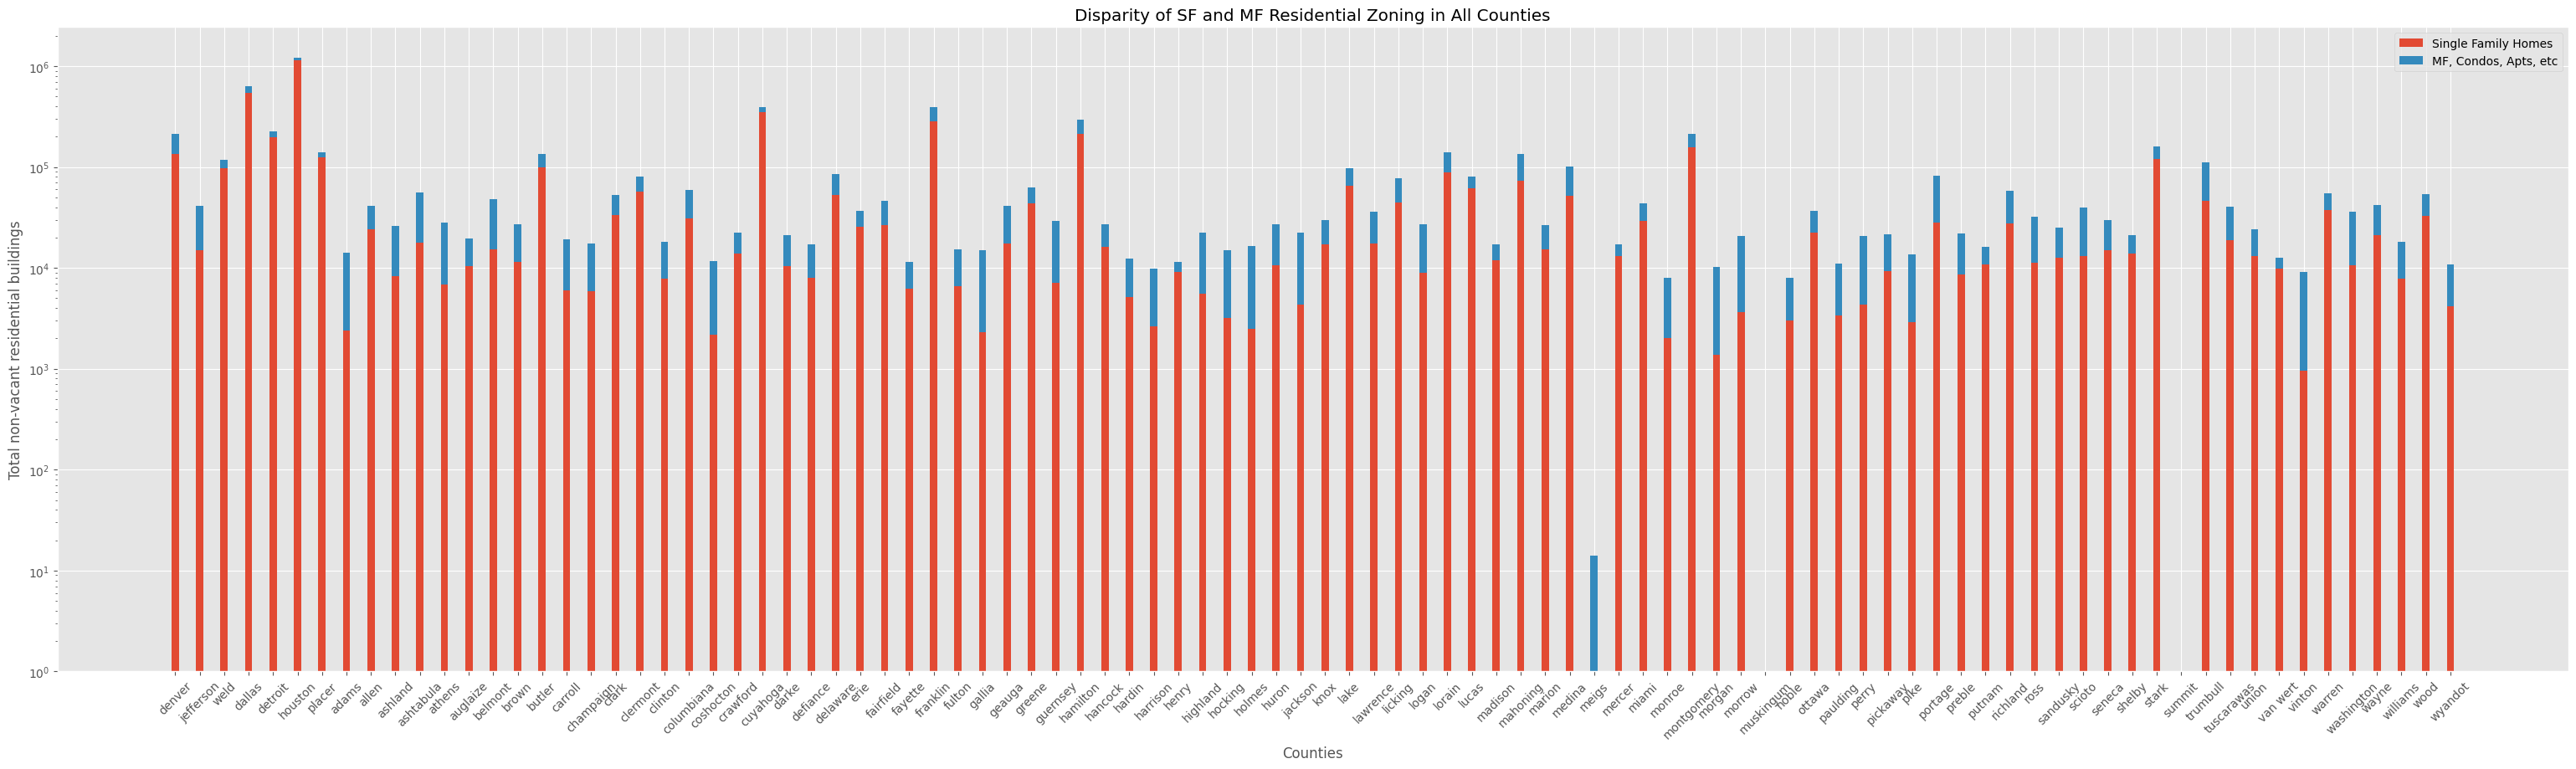

In [36]:
plt.style.use('ggplot')
#county by the number of single family vs other residentials
fig, ax = plt.subplots(figsize=(30, 10))
ax.bar(county, sf_residential, label='Single Family Homes', width=0.30)
ax.bar(county, multi_residential, bottom=sf_residential, label='MF, Condos, Apts, etc', width=0.30)
ax.set_ylabel('Total non-vacant residential buildings')
ax.set_xlabel('Counties')
ax.set_title('Disparity of SF and MF Residential Zoning in All Counties')
ax.set_yscale('log')
ax.legend()
ax.tick_params(axis='x', rotation=45)
plt.subplots_adjust(left=0.0, right=1.0)